In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# generating data
np.random.seed(42)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X**3 + X**2 - X + 3 + np.random.normal(0, 5, 100)
X = X.reshape(-1, 1)


In [3]:
# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Polynomial Regression from scratch
class PolynomialRegression:
    def __init__(self, degree=3):
        self.degree = degree
        self.coef_ = None
    
    def _polynomial_features(self, X):
        return np.hstack([X**i for i in range(self.degree + 1)])
    
    def fit(self, X, y):
        X_poly = self._polynomial_features(X)
        # Normal Equation: theta = (X^T X)^-1 X^T y
        self.coef_ = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

    def predict(self, X):
        X_poly = self._polynomial_features(X)
        return X_poly @ self.coef_

In [5]:
# Training the model
model = PolynomialRegression(degree=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


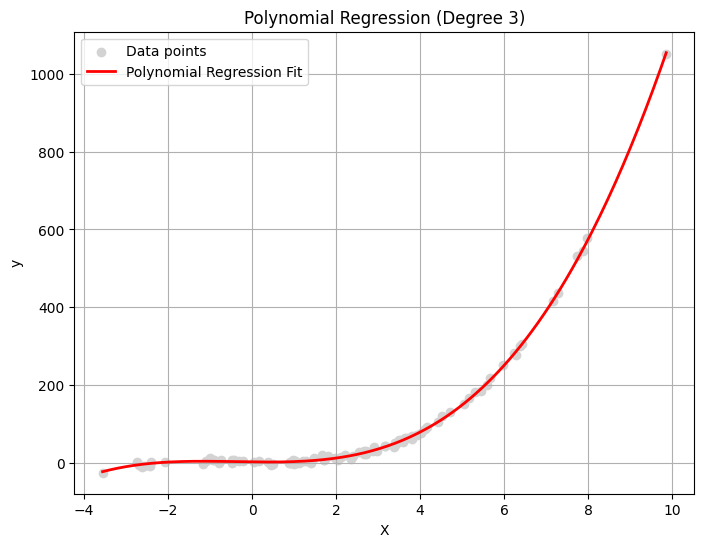

In [6]:
# Visualization
X_line = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_line = model.predict(X_line)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='lightgray', label='Data points')
plt.plot(X_line, y_line, color='red', linewidth=2, label='Polynomial Regression Fit')
plt.title("Polynomial Regression (Degree 3)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
